In [1]:
import pandas as pd
import pickle as pkl
import sys
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import spearmanr
import numpy as np

sys.path.append("/work/magroup/kaileyhu/synthetic_lethality")

import prediction.sCilantro.nn_helpers.via_film as via_film
import prediction.sCilantro.nn_helpers.pair_classifier as pc_module
import prediction.sCilantro.nn_helpers.training_framework as training_framework
import prediction.sCilantro.nn_helpers.via_embedder as via_embedder

Torch imports completed
Torch imports completed
INFO: Pandarallel will run on 32 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [3]:
path = "/work/magroup/kaileyhu/res/perturbed/gf_12L_30M_i2048_SL/gene2vec_df"
name = "pretraining_stats"
cv = 1
metrics_dict_path = f"/work/magroup/kaileyhu/res/ablations/cv{cv}/{name}.pkl"

with open("/work/magroup/kaileyhu/datasets/SynLethSampled/all_pairs_NSP_EXP_5x.pkl", "rb") as f:
    pair_list = pkl.load(f)

print(f"Running general model with FiLM pretraining using EXP5 CV{cv}")

Running general model with FiLM pretraining using EXP5 CV1


In [16]:
print("Viability embedding generation")
df = pd.read_hdf(f"{path}/gene2vec_emb_mat.h5", "table")
print(f"df shape is {df.shape}")

ve = via_film.via_film(df, input_length = 640)
ve.init_regression(batch_size=512, lr=0.001, num_epochs=100)

Viability embedding generation


KeyboardInterrupt: 

In [5]:
# all_test, all_train, test_sets, train_sets = ve.setup_cv(folds=5, get_sets = True)

Setting up dataset with n_features = 640
Setting up dataset with n_features = 640
Test dataset shuffle is false
Setting up dataset with n_features = 640
Setting up dataset with n_features = 640
Test dataset shuffle is false
Setting up dataset with n_features = 640
Setting up dataset with n_features = 640
Test dataset shuffle is false
Setting up dataset with n_features = 640
Setting up dataset with n_features = 640
Test dataset shuffle is false
Setting up dataset with n_features = 640
Setting up dataset with n_features = 640
Test dataset shuffle is false


In [ ]:
# with open (f"/work/magroup/kaileyhu/res/pretraining_stats/static_test_train.pkl", "wb") as f:
#     pkl.dump((all_test, all_train, test_sets, train_sets), f)

In [4]:
# with open (f"/work/magroup/kaileyhu/res/pretraining_stats/static_test_train.pkl", "rb") as f:
#     all_test, all_train, test_sets, train_sets = pkl.load(f)

In [ ]:
ve.dl = all_train[0]
ve.dl_test = all_test[0]

In [10]:
ve.train_nn(f"/work/magroup/kaileyhu/synthetic_lethality/prediction/sCilantro/models/pretraining_figure_regular_fold_0")

Protein size is 128
Starting to train, saving result at /work/magroup/kaileyhu/synthetic_lethality/prediction/sCilantro/models/pretraining_figure_perturbed_fold_0


  1%|          | 1/100 [00:26<44:15, 26.83s/it]

Epoch: 0 / 100, Loss: 0.014593344930116638


  2%|▏         | 2/100 [00:52<42:33, 26.05s/it]

Epoch: 1 / 100, Loss: 0.0018738238916343047


  3%|▎         | 3/100 [01:17<41:45, 25.83s/it]

Epoch: 2 / 100, Loss: 0.0016033998968892685


  4%|▍         | 4/100 [01:43<41:11, 25.75s/it]

Epoch: 3 / 100, Loss: 0.0013868946885092748


  5%|▌         | 5/100 [02:09<40:46, 25.75s/it]

Epoch: 4 / 100, Loss: 0.0008830690008614854


  6%|▌         | 6/100 [02:34<40:19, 25.74s/it]

Epoch: 5 / 100, Loss: 0.0008467464143750028


  7%|▋         | 7/100 [03:00<39:53, 25.74s/it]

Epoch: 6 / 100, Loss: 0.0007089006302345804


  8%|▊         | 8/100 [03:26<39:28, 25.74s/it]

Epoch: 7 / 100, Loss: 0.0006032290828288304


  9%|▉         | 9/100 [03:52<39:02, 25.74s/it]

Epoch: 8 / 100, Loss: 0.0005886548827116027


 10%|█         | 10/100 [04:18<38:37, 25.75s/it]

Epoch: 9 / 100, Loss: 0.0005177373476860832


 11%|█         | 11/100 [04:43<38:14, 25.78s/it]

Epoch: 10 / 100, Loss: 0.0004651530962971757


 12%|█▏        | 12/100 [05:09<37:50, 25.80s/it]

Epoch: 11 / 100, Loss: 0.0004191066542130773


 13%|█▎        | 13/100 [05:35<37:37, 25.94s/it]

Epoch: 12 / 100, Loss: 0.0004191261259853252


 14%|█▍        | 14/100 [06:01<37:09, 25.92s/it]

Epoch: 13 / 100, Loss: 0.00038759090217712076


 15%|█▌        | 15/100 [06:27<36:39, 25.88s/it]

Epoch: 14 / 100, Loss: 0.00036470703747014697


 16%|█▌        | 16/100 [06:53<36:08, 25.82s/it]

Epoch: 15 / 100, Loss: 0.0004548200447261181


 17%|█▋        | 17/100 [07:18<35:36, 25.75s/it]

Epoch: 16 / 100, Loss: 0.00041954585292603683


 18%|█▊        | 18/100 [07:44<35:10, 25.74s/it]

Epoch: 17 / 100, Loss: 0.0003481977826058788


 19%|█▉        | 19/100 [08:10<34:46, 25.76s/it]

Epoch: 18 / 100, Loss: 0.0003661289437472168


 20%|██        | 20/100 [08:36<34:20, 25.76s/it]

Epoch: 19 / 100, Loss: 0.00029595981161663554


 21%|██        | 21/100 [09:02<33:57, 25.79s/it]

Epoch: 20 / 100, Loss: 0.0002857180573423126


 22%|██▏       | 22/100 [09:27<33:31, 25.79s/it]

Epoch: 21 / 100, Loss: 0.00027707973096021603


 23%|██▎       | 23/100 [09:53<33:05, 25.78s/it]

Epoch: 22 / 100, Loss: 0.0002583569923385245


 24%|██▍       | 24/100 [10:19<32:38, 25.77s/it]

Epoch: 23 / 100, Loss: 0.0003154645388092861


 25%|██▌       | 25/100 [10:45<32:12, 25.77s/it]

Epoch: 24 / 100, Loss: 0.0002835548886555518


 26%|██▌       | 26/100 [11:10<31:47, 25.77s/it]

Epoch: 25 / 100, Loss: 0.00021927885901858957


 27%|██▋       | 27/100 [11:36<31:22, 25.78s/it]

Epoch: 26 / 100, Loss: 0.00023048606687358993


 28%|██▊       | 28/100 [12:02<30:59, 25.82s/it]

Epoch: 27 / 100, Loss: 0.00023582170505580477


 29%|██▉       | 29/100 [12:28<30:31, 25.80s/it]

Epoch: 28 / 100, Loss: 0.0002454718700063808


 30%|███       | 30/100 [12:54<30:05, 25.79s/it]

Epoch: 29 / 100, Loss: 0.0002082453329737783


 31%|███       | 31/100 [13:19<29:37, 25.77s/it]

Epoch: 30 / 100, Loss: 0.00021644793449639586


 32%|███▏      | 32/100 [13:45<29:13, 25.78s/it]

Epoch: 31 / 100, Loss: 0.00021419430498800004


 33%|███▎      | 33/100 [14:11<28:50, 25.82s/it]

Epoch: 32 / 100, Loss: 0.00019920514288194265


 34%|███▍      | 34/100 [14:37<28:24, 25.83s/it]

Epoch: 33 / 100, Loss: 0.00021037300581305257


 35%|███▌      | 35/100 [15:03<27:59, 25.84s/it]

Epoch: 34 / 100, Loss: 0.0002043510719999713


 36%|███▌      | 36/100 [15:29<27:33, 25.83s/it]

Epoch: 35 / 100, Loss: 0.00018504848164068745


 37%|███▋      | 37/100 [15:54<27:07, 25.84s/it]

Epoch: 36 / 100, Loss: 0.00019980284358784135


 38%|███▊      | 38/100 [16:20<26:42, 25.85s/it]

Epoch: 37 / 100, Loss: 0.00018945536411369264


 39%|███▉      | 39/100 [16:46<26:16, 25.85s/it]

Epoch: 38 / 100, Loss: 0.00019056309488211704


 40%|████      | 40/100 [17:12<25:50, 25.85s/it]

Epoch: 39 / 100, Loss: 0.00019183462836586902


 41%|████      | 41/100 [17:38<25:25, 25.85s/it]

Epoch: 40 / 100, Loss: 0.00018140810716550865


 42%|████▏     | 42/100 [18:04<25:00, 25.87s/it]

Epoch: 41 / 100, Loss: 0.0001872393462082207


 43%|████▎     | 43/100 [18:30<24:40, 25.97s/it]

Epoch: 42 / 100, Loss: 0.00019028504834735582


 44%|████▍     | 44/100 [18:56<24:15, 26.00s/it]

Epoch: 43 / 100, Loss: 0.00017240799536936169


 45%|████▌     | 45/100 [19:22<23:47, 25.95s/it]

Epoch: 44 / 100, Loss: 0.00018891312623039636


 46%|████▌     | 46/100 [19:48<23:21, 25.95s/it]

Epoch: 45 / 100, Loss: 0.0001704795666758952


 47%|████▋     | 47/100 [20:14<22:57, 25.99s/it]

Epoch: 46 / 100, Loss: 0.00017828851113798187


 48%|████▊     | 48/100 [20:40<22:28, 25.93s/it]

Epoch: 47 / 100, Loss: 0.00018047067812180191


 49%|████▉     | 49/100 [21:06<22:01, 25.91s/it]

Epoch: 48 / 100, Loss: 0.0001797597172021671


 50%|█████     | 50/100 [21:31<21:33, 25.88s/it]

Epoch: 49 / 100, Loss: 0.00017338101627039398


 51%|█████     | 51/100 [21:57<21:05, 25.83s/it]

Epoch: 50 / 100, Loss: 0.00017720811647092485


 52%|█████▏    | 52/100 [22:23<20:39, 25.83s/it]

Epoch: 51 / 100, Loss: 0.00016399361588705913


 53%|█████▎    | 53/100 [22:49<20:13, 25.81s/it]

Epoch: 52 / 100, Loss: 0.00017167520952543632


 54%|█████▍    | 54/100 [23:14<19:47, 25.81s/it]

Epoch: 53 / 100, Loss: 0.00016867421392757412


 55%|█████▌    | 55/100 [23:40<19:21, 25.82s/it]

Epoch: 54 / 100, Loss: 0.0001586613627105329


 56%|█████▌    | 56/100 [24:06<18:55, 25.82s/it]

Epoch: 55 / 100, Loss: 0.00017350772998799555


 57%|█████▋    | 57/100 [24:32<18:31, 25.85s/it]

Epoch: 56 / 100, Loss: 0.0001599863299503102


 58%|█████▊    | 58/100 [24:58<18:05, 25.84s/it]

Epoch: 57 / 100, Loss: 0.00016238687027028196


 59%|█████▉    | 59/100 [25:24<17:38, 25.81s/it]

Epoch: 58 / 100, Loss: 0.0001726946307641557


 60%|██████    | 60/100 [25:49<17:12, 25.82s/it]

Epoch: 59 / 100, Loss: 0.0001666107924655557


 61%|██████    | 61/100 [26:15<16:49, 25.88s/it]

Epoch: 60 / 100, Loss: 0.0001507190420646812


 62%|██████▏   | 62/100 [26:41<16:23, 25.89s/it]

Epoch: 61 / 100, Loss: 0.00018683125003485284


 63%|██████▎   | 63/100 [27:07<15:57, 25.89s/it]

Epoch: 62 / 100, Loss: 0.0001487573884508895


 64%|██████▍   | 64/100 [27:33<15:32, 25.89s/it]

Epoch: 63 / 100, Loss: 0.000153514330150592


 65%|██████▌   | 65/100 [27:59<15:06, 25.90s/it]

Epoch: 64 / 100, Loss: 0.00014986635826300966


 66%|██████▌   | 66/100 [28:25<14:40, 25.91s/it]

Epoch: 65 / 100, Loss: 0.00015659769559250457


 67%|██████▋   | 67/100 [28:51<14:14, 25.90s/it]

Epoch: 66 / 100, Loss: 0.00014899450097591844


 68%|██████▊   | 68/100 [29:17<13:48, 25.90s/it]

Epoch: 67 / 100, Loss: 0.00015950812251876265


 69%|██████▉   | 69/100 [29:43<13:22, 25.89s/it]

Epoch: 68 / 100, Loss: 0.00015713628393001033


 70%|███████   | 70/100 [30:09<12:56, 25.90s/it]

Epoch: 69 / 100, Loss: 0.00017282711539143644


 71%|███████   | 71/100 [30:35<12:32, 25.93s/it]

Epoch: 70 / 100, Loss: 0.00014331708512518014


 72%|███████▏  | 72/100 [31:00<12:05, 25.91s/it]

Epoch: 71 / 100, Loss: 0.00014569701622960685


 73%|███████▎  | 73/100 [31:26<11:38, 25.86s/it]

Epoch: 72 / 100, Loss: 0.00015375448762630991


 74%|███████▍  | 74/100 [31:52<11:12, 25.85s/it]

Epoch: 73 / 100, Loss: 0.0001534277836665259


 75%|███████▌  | 75/100 [32:18<10:46, 25.87s/it]

Epoch: 74 / 100, Loss: 0.00016081237804771307


 76%|███████▌  | 76/100 [32:44<10:20, 25.86s/it]

Epoch: 75 / 100, Loss: 0.0001431834325361348


 77%|███████▋  | 77/100 [33:10<09:54, 25.83s/it]

Epoch: 76 / 100, Loss: 0.00015454338824488108


 78%|███████▊  | 78/100 [33:35<09:28, 25.82s/it]

Epoch: 77 / 100, Loss: 0.0001423538743688741


 79%|███████▉  | 79/100 [34:01<09:02, 25.81s/it]

Epoch: 78 / 100, Loss: 0.00014685730421347886


 80%|████████  | 80/100 [34:27<08:36, 25.81s/it]

Epoch: 79 / 100, Loss: 0.0001577469319943434


 81%|████████  | 81/100 [34:53<08:10, 25.82s/it]

Epoch: 80 / 100, Loss: 0.00014465688770318682


 82%|████████▏ | 82/100 [35:19<07:44, 25.80s/it]

Epoch: 81 / 100, Loss: 0.00016119046089353687


 83%|████████▎ | 83/100 [35:44<07:18, 25.80s/it]

Epoch: 82 / 100, Loss: 0.00013784598773901186


 84%|████████▍ | 84/100 [36:10<06:52, 25.80s/it]

Epoch: 83 / 100, Loss: 0.00014768080720506212


 85%|████████▌ | 85/100 [36:36<06:27, 25.83s/it]

Epoch: 84 / 100, Loss: 0.00014876104635061252


 86%|████████▌ | 86/100 [37:02<06:01, 25.82s/it]

Epoch: 85 / 100, Loss: 0.00014502139314930394


 87%|████████▋ | 87/100 [37:28<05:35, 25.78s/it]

Epoch: 86 / 100, Loss: 0.00014783760379464558


 88%|████████▊ | 88/100 [37:53<05:09, 25.79s/it]

Epoch: 87 / 100, Loss: 0.0001425292665357358


 89%|████████▉ | 89/100 [38:19<04:43, 25.81s/it]

Epoch: 88 / 100, Loss: 0.00013335858498588797


 90%|█████████ | 90/100 [38:45<04:17, 25.79s/it]

Epoch: 89 / 100, Loss: 0.0001352783422622511


 91%|█████████ | 91/100 [39:11<03:52, 25.78s/it]

Epoch: 90 / 100, Loss: 0.0001458135213802872


 92%|█████████▏| 92/100 [39:36<03:26, 25.77s/it]

Epoch: 91 / 100, Loss: 0.00013975454057143624


 93%|█████████▎| 93/100 [40:02<03:00, 25.78s/it]

Epoch: 92 / 100, Loss: 0.00013087634843002172


 94%|█████████▍| 94/100 [40:28<02:34, 25.78s/it]

Epoch: 93 / 100, Loss: 0.00014456186438975072


 95%|█████████▌| 95/100 [40:54<02:08, 25.78s/it]

Epoch: 94 / 100, Loss: 0.00013310824069090723


 96%|█████████▌| 96/100 [41:20<01:43, 25.78s/it]

Epoch: 95 / 100, Loss: 0.00013281784691422278


 97%|█████████▋| 97/100 [41:45<01:17, 25.79s/it]

Epoch: 96 / 100, Loss: 0.00013463551146846616


 98%|█████████▊| 98/100 [42:11<00:51, 25.80s/it]

Epoch: 97 / 100, Loss: 0.00012835153258075464


 99%|█████████▉| 99/100 [42:37<00:25, 25.82s/it]

Epoch: 98 / 100, Loss: 0.00013822175999803966


100%|██████████| 100/100 [43:03<00:00, 25.83s/it]

Epoch: 99 / 100, Loss: 0.0001244225813994102
Finished Training
Saving model at /work/magroup/kaileyhu/synthetic_lethality/prediction/sCilantro/models/pretraining_figure_perturbed_fold_0


In [11]:
y_pred, y_true = ve.test_nn()

100%|██████████| 390334/390334 [02:10<00:00, 2994.26it/s]

Done testing, MSE: 0.00023469258339748974


In [21]:
with open (f"/work/magroup/kaileyhu/res/pretraining_stats/perturbed.pkl", "wb") as f:
    pkl.dump((y_pred, y_true, list(test_sets[0].index)), f)

In [13]:
all_test[0]

In [15]:
y_pred[0], y_pred[1], y_pred[3]

(-0.01930319517850876, 0.1606472134590149, -0.3373846113681793)

## visualizations

In [2]:
from ast import literal_eval
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import spearmanr


In [3]:
metadata = pd.read_csv("/work/magroup/kaileyhu/datasets/depmap/metadata.csv")
metadata.set_index("ModelID", inplace = True)

tissues = [str(t).lower() for (t, v) in Counter(metadata['SampleCollectionSite']).items() if v > 10 and str(t) != 'nan' and str(t) != 'unknown']


In [4]:
with open (f"/work/magroup/kaileyhu/res/pretraining_stats/perturbed.pkl", "rb") as f:
    perturbed_pred, perturbed_true, perturbed_names = pkl.load(f)

In [5]:
perturbed_df = pd.DataFrame([perturbed_pred, perturbed_true, perturbed_names])
perturbed_df = perturbed_df.T
perturbed_df.set_index(2, inplace = True)
perturbed_df['patient'] = list(map(lambda x : literal_eval(x)[0], list(perturbed_df.index)))
perturbed_df['mse'] = perturbed_df.apply(lambda row: (row[1] - row[0])**2, axis = 1)

In [31]:
relevant_patients = list(dict(Counter(perturbed_df['patient'])).keys())[:10]

In [96]:
pt_df = perturbed_df[perturbed_df['patient'].isin(relevant_patients)]

<Figure size 1000x600 with 0 Axes>

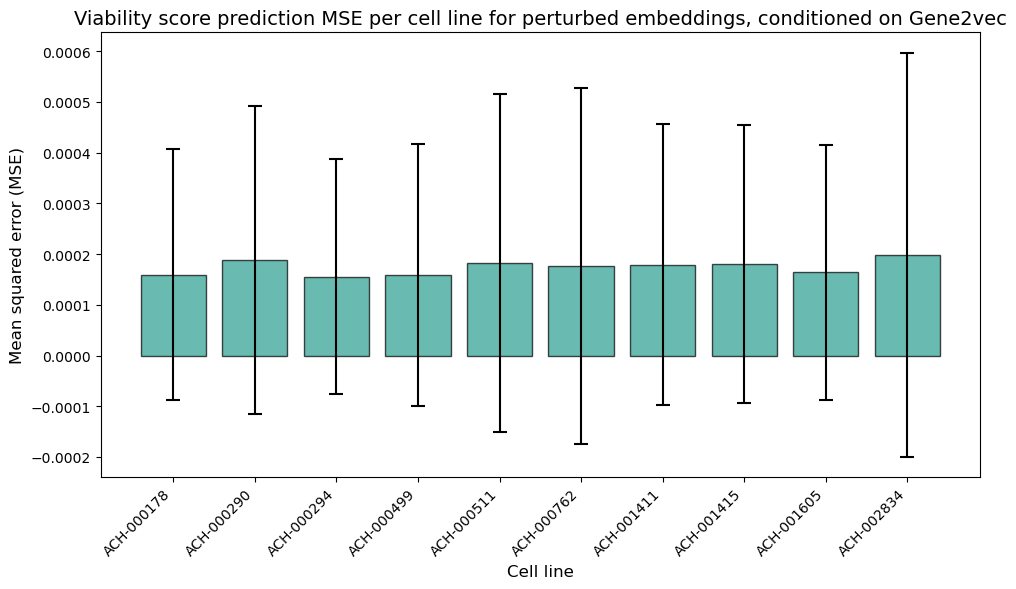

In [61]:
plt.figure(figsize=(10, 6))

df = smaller_df

summary_df = df.groupby('patient')['mse'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(10, 6))

# Create the bar plot, using 'std' column for error bars
plt.bar(summary_df['patient'], summary_df['mean'],
        yerr=summary_df['std'],     # Standard deviation as error bar height
        capsize=5,                  # Width of the error bar caps
        color='#2A9D8F',
        edgecolor='black',
        alpha=0.7,
        error_kw={'elinewidth': 1.5, 'capthick': 1.5})

plt.title('Viability score prediction MSE per cell line for perturbed embeddings, conditioned on Gene2vec', fontsize=14)
plt.xlabel('Cell line', fontsize=12)
plt.ylabel('Mean squared error (MSE)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [6]:
with open (f"/work/magroup/kaileyhu/res/pretraining_stats/delta_only.pkl", "rb") as f:
    delta_pred, delta_true, delta_names = pkl.load(f)

In [7]:
delta_df = pd.DataFrame([delta_pred, delta_true, delta_names])
delta_df = delta_df.T
delta_df.set_index(2, inplace = True)
delta_df['patient'] = list(map(lambda x : literal_eval(x)[0], list(delta_df.index)))
delta_df['mse'] = delta_df.apply(lambda row: (row[1] - row[0])**2, axis = 1)

In [65]:
d_df = delta_df[delta_df['patient'].isin(relevant_patients)]

<Figure size 1000x600 with 0 Axes>

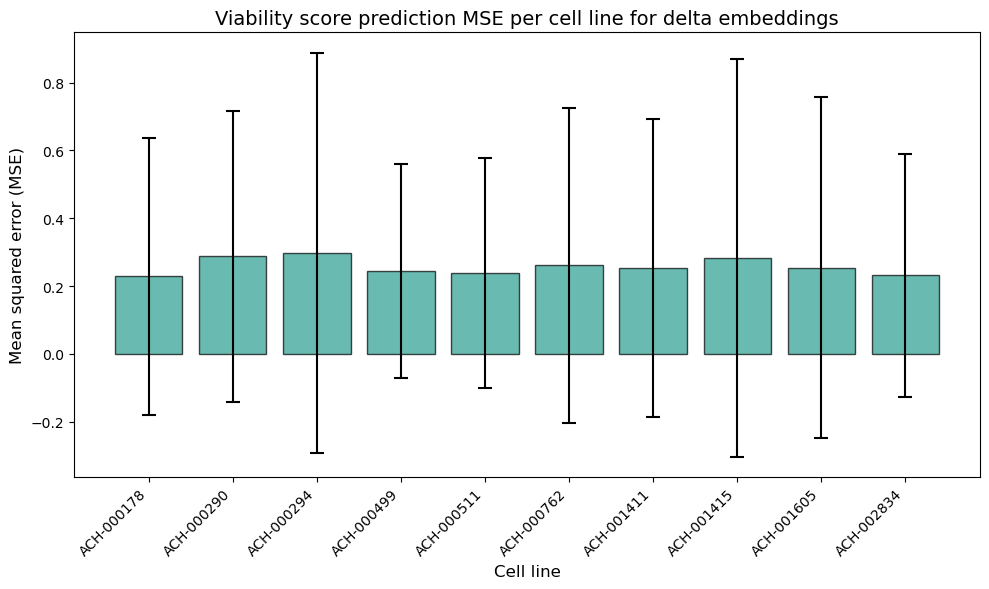

In [66]:
plt.figure(figsize=(10, 6))

df = d_df

summary_df = df.groupby('patient')['mse'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(10, 6))

# Create the bar plot, using 'std' column for error bars
plt.bar(summary_df['patient'], summary_df['mean'],
        yerr=summary_df['std'],     # Standard deviation as error bar height
        capsize=5,                  # Width of the error bar caps
        color='#2A9D8F',
        edgecolor='black',
        alpha=0.7,
        error_kw={'elinewidth': 1.5, 'capthick': 1.5})

plt.title('Viability score prediction MSE per cell line for delta embeddings', fontsize=14)
plt.xlabel('Cell line', fontsize=12)
plt.ylabel('Mean squared error (MSE)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [8]:
with open (f"/work/magroup/kaileyhu/res/pretraining_stats/regular.pkl", "rb") as f:
    reg_pred, reg_true, reg_names = pkl.load(f)

In [9]:
reg_df = pd.DataFrame([reg_pred, reg_true, reg_names])
reg_df = reg_df.T
reg_df.set_index(2, inplace = True)
reg_df['patient'] = list(map(lambda x : literal_eval(x)[0], list(reg_df.index)))
reg_df['mse'] = reg_df.apply(lambda row: (row[1] - row[0])**2, axis = 1)

In [69]:
r_df = reg_df[reg_df['patient'].isin(relevant_patients)]

<Figure size 1000x600 with 0 Axes>

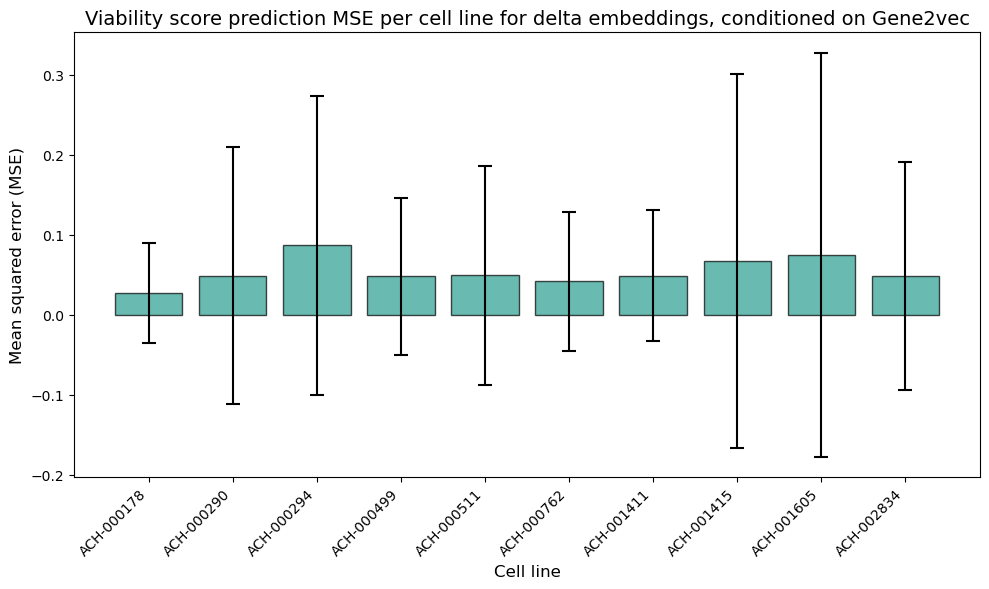

In [71]:
plt.figure(figsize=(10, 6))

df = r_df

summary_df = df.groupby('patient')['mse'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(10, 6))

# Create the bar plot, using 'std' column for error bars
plt.bar(summary_df['patient'], summary_df['mean'],
        yerr=summary_df['std'],     # Standard deviation as error bar height
        capsize=5,                  # Width of the error bar caps
        color='#2A9D8F',
        edgecolor='black',
        alpha=0.7,
        error_kw={'elinewidth': 1.5, 'capthick': 1.5})

plt.title('Viability score prediction MSE per cell line for delta embeddings, conditioned on Gene2vec', fontsize=14)
plt.xlabel('Cell line', fontsize=12)
plt.ylabel('Mean squared error (MSE)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [72]:
summary_df = df.groupby('patient')

In [11]:
def r2(group_df):
    y_true = list(group_df[1])
    y_pred = list(group_df[0])
    r2 = r2_score(y_true, y_pred)
    return r2

def spearman(group_df):
    y_true = list(group_df[1])
    y_pred = list(group_df[0])
    corr, p_value = spearmanr(y_true, y_pred)
    return corr

def rmse(group_df):
    y_true = list(group_df[1])
    y_pred = list(group_df[0])
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

In [19]:
reg_r2 = reg_df.groupby('patient').apply(r2).reset_index()
pt_r2 = perturbed_df.groupby('patient').apply(r2).reset_index()
d_r2 = delta_df.groupby('patient').apply(r2).reset_index()

reg_mean = reg_r2[0].mean()
reg_std = reg_r2[0].std()

delta_mean = d_r2[0].mean()
delta_std = d_r2[0].std()

pt_mean = pt_r2[0].mean()
pt_std = pt_r2[0].std()

# stats_df = pd.DataFrame([[reg_mean, reg_std], [pt_mean, pt_std], [delta_mean, delta_std]])
# stats_df.index = ["Delta with Gene2vec", "Perturbed with Gene2vec", "Delta only"]

# stats_df

In [21]:
reg_sp = reg_df.groupby('patient').apply(spearman).reset_index()
pt_sp = perturbed_df.groupby('patient').apply(spearman).reset_index()
d_sp = delta_df.groupby('patient').apply(spearman).reset_index()

spearman_reg_mean = reg_sp[0].mean()
spearman_reg_std = reg_sp[0].std()

spearman_pt_mean = pt_sp[0].mean()
spearman_pt_std = pt_sp[0].std()

spearman_delta_mean = d_sp[0].mean()
spearman_delta_std = d_sp[0].std()


In [22]:
reg_rmse = reg_df.groupby('patient').apply(rmse).reset_index()
pt_rmse = perturbed_df.groupby('patient').apply(rmse).reset_index()
d_rmse = delta_df.groupby('patient').apply(rmse).reset_index()

rmse_reg_mean = reg_rmse[0].mean()
rmse_reg_std = reg_rmse[0].std()

rmse_pt_mean = pt_rmse[0].mean()
rmse_pt_std = pt_rmse[0].std()

rmse_delta_mean = d_rmse[0].mean()
rmse_delta_std = d_rmse[0].std()


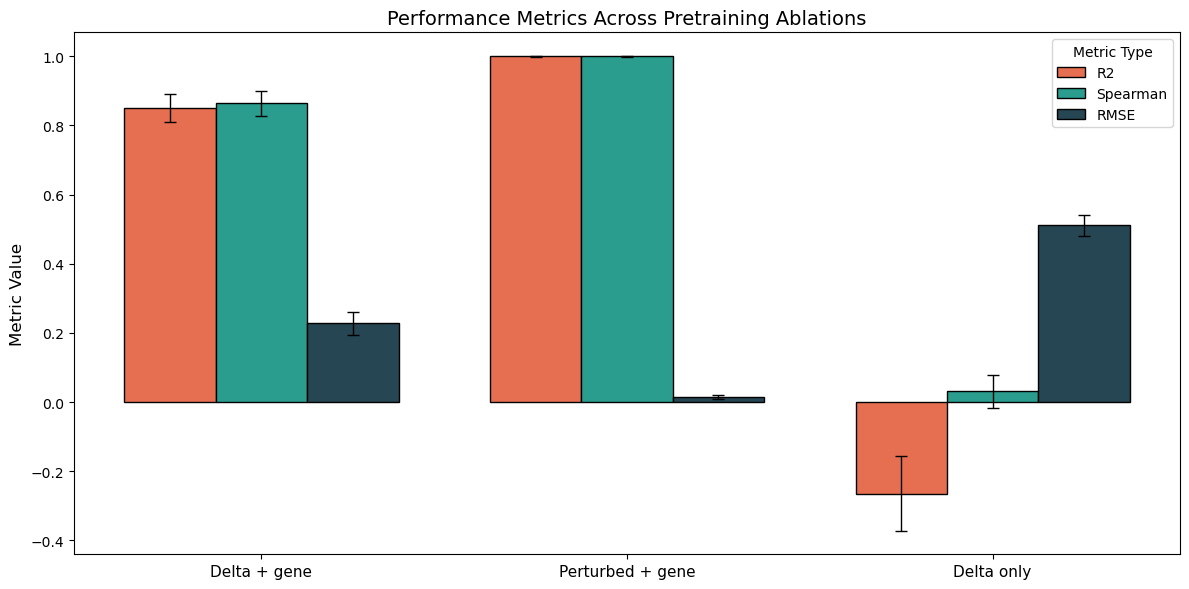

In [30]:
data = {
    'Input': [
        'Delta + gene', 'Perturbed + gene', 'Delta only',
        'Delta + gene', 'Perturbed + gene', 'Delta only',
        'Delta + gene', 'Perturbed + gene', 'Delta only',
    ],
    'Metric': [
        'R2', 'R2', 'R2', 
        'Spearman', 'Spearman', 'Spearman', 
        'RMSE', 'RMSE', 'RMSE'
    ],
    'Value': [
        reg_mean, pt_mean, delta_mean, # R2 values (approx from your figure)
        spearman_reg_mean, spearman_pt_mean, spearman_delta_mean, # Spearman values (approx from your figure)
        rmse_reg_mean, rmse_pt_mean, rmse_delta_mean  # RMSE values (hypothetical, notice the different scale)
    ],
    'Error': [
        reg_std, pt_std, delta_std, 
        spearman_reg_std, spearman_pt_std, spearman_delta_std, 
        rmse_reg_std, rmse_pt_std, rmse_delta_std
    ]
}

# Convert to DataFrame and pivot for easier plotting setup
combined_stats_df = pd.DataFrame(data)

# --- 2. Plotting Setup ---
# Define categories, metrics, and colors
input_categories = combined_stats_df['Input'].unique()
metrics = combined_stats_df['Metric'].unique()
metric_colors = {
    'R2': '#E76F51',      # Terracotta
    'Spearman': '#2A9D8F', # Teal
    'RMSE': '#264653'     # Dark Blue
}

# Bar plotting parameters
bar_width = 0.25
num_metrics = len(metrics)
# Calculate the positions for the groups of bars
x = np.arange(len(input_categories))

plt.figure(figsize=(12, 6))

# --- 3. Loop to Plot Bars for Each Metric ---
for i, metric in enumerate(metrics):
    # Filter data for the current metric
    subset = combined_stats_df[combined_stats_df['Metric'] == metric].reset_index(drop=True)
    
    # Calculate the position for the current set of bars
    # This centers the group of bars on the x-tick
    position = x + (i - num_metrics / 2 + 0.5) * bar_width
    
    # Plot the bars with error bars
    plt.bar(position, subset['Value'],
            yerr=subset['Error'],
            width=bar_width,
            capsize=4,
            color=metric_colors[metric],
            edgecolor='black',
            linewidth=1,
            error_kw={'elinewidth': 1.0, 'capthick': 1.0},
            label=metric)

# --- 4. Final Formatting and Labels ---

plt.title('Performance Metrics Across Pretraining Ablations', fontsize=14)
# Y-axis label is generic since metrics are mixed
plt.ylabel('Metric Value', fontsize=12) 

# Set the x-ticks to be centered and labeled with the input categories
plt.xticks(x, input_categories, rotation=0, ha='center', fontsize=11)

# Add a subtle grid
# plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add legend
plt.legend(title='Metric Type', loc='best')

# Remove the top and right borders (spines) for a cleaner look
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('figs_to_use/combined_pretraining_metrics.pdf')
# plt.show()

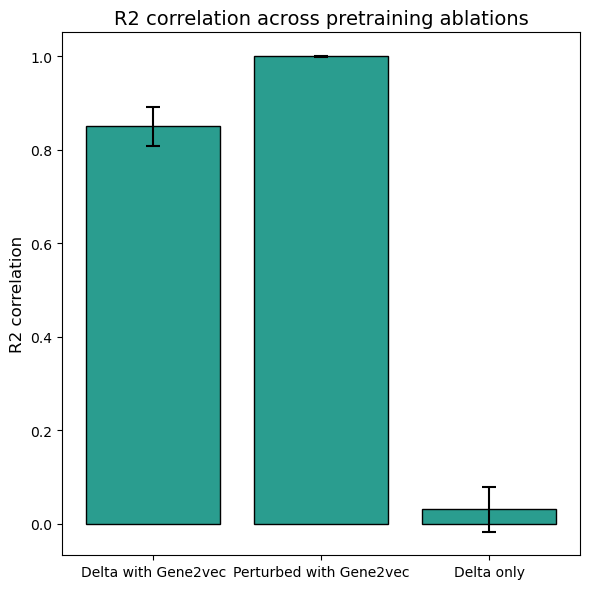

In [143]:
plt.figure(figsize=(6, 6))

plt.bar(stats_df.index, stats_df[0],
        yerr=stats_df[1],
        capsize=5,                  # Width of the error bar caps
        color='#2A9D8F',
        edgecolor='black',
        error_kw={'elinewidth': 1.5, 'capthick': 1.5})

plt.title('R2 correlation across pretraining ablations', fontsize=14)
plt.ylabel('R2 correlation', fontsize=12)
plt.tight_layout()
plt.savefig('figs_to_use/r2_pretraining.svg')
# plt.show()

In [144]:
reg_r2 = reg_df.groupby('patient').apply(spearman).reset_index()
pt_r2 = perturbed_df.groupby('patient').apply(spearman).reset_index()
d_r2 = delta_df.groupby('patient').apply(spearman).reset_index()

reg_mean = r2_corr[0].mean()
reg_std = r2_corr[0].std()

delta_mean = d_r2[0].mean()
delta_std = d_r2[0].std()

pt_mean = pt_r2[0].mean()
pt_std = pt_r2[0].std()

stats_df = pd.DataFrame([[reg_mean, reg_std], [pt_mean, pt_std], [delta_mean, delta_std]])
stats_df.index = ["Delta with Gene2vec", "Perturbed with Gene2vec", "Delta only"]

stats_df

,0,1
Delta with Gene2vec,0.850204,0.041296
Perturbed with Gene2vec,0.999730,0.000660
Delta only,0.031356,0.047740


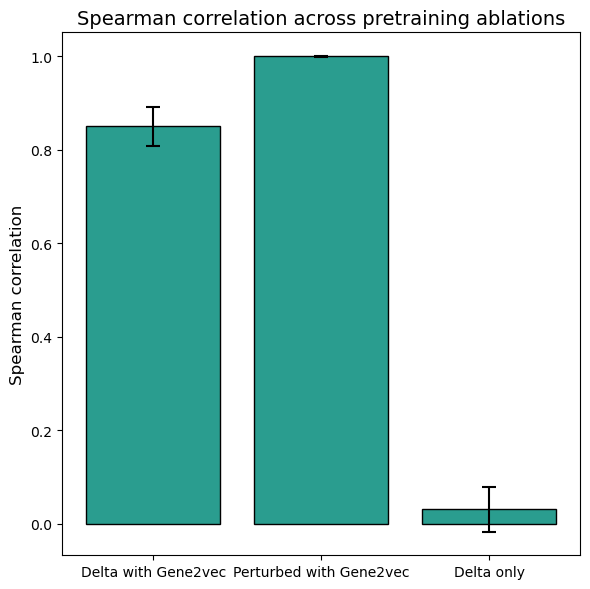

In [146]:
plt.figure(figsize=(6, 6))

plt.bar(stats_df.index, stats_df[0],
        yerr=stats_df[1],
        capsize=5,                  # Width of the error bar caps
        color='#2A9D8F',
        edgecolor='black',
        error_kw={'elinewidth': 1.5, 'capthick': 1.5})

plt.title('Spearman correlation across pretraining ablations', fontsize=14)
plt.ylabel('Spearman correlation', fontsize=12)
plt.tight_layout()
plt.savefig('figs_to_use/spearman_pretraining.pdf')

In [150]:
reg_r2 = reg_df.groupby('patient').apply(rmse).reset_index()
pt_r2 = perturbed_df.groupby('patient').apply(rmse).reset_index()
d_r2 = delta_df.groupby('patient').apply(rmse).reset_index()

reg_mean = r2_corr[0].mean()
reg_std = r2_corr[0].std()

delta_mean = d_r2[0].mean()
delta_std = d_r2[0].std()

pt_mean = pt_r2[0].mean()
pt_std = pt_r2[0].std()

stats_df = pd.DataFrame([[0.231, reg_std], [pt_mean, pt_std], [delta_mean, delta_std]])
stats_df.index = ["Delta with Gene2vec", "Perturbed with Gene2vec", "Delta only"]

stats_df

,0,1
Delta with Gene2vec,0.231000,0.041296
Perturbed with Gene2vec,0.014361,0.005367
Delta only,0.511426,0.030215


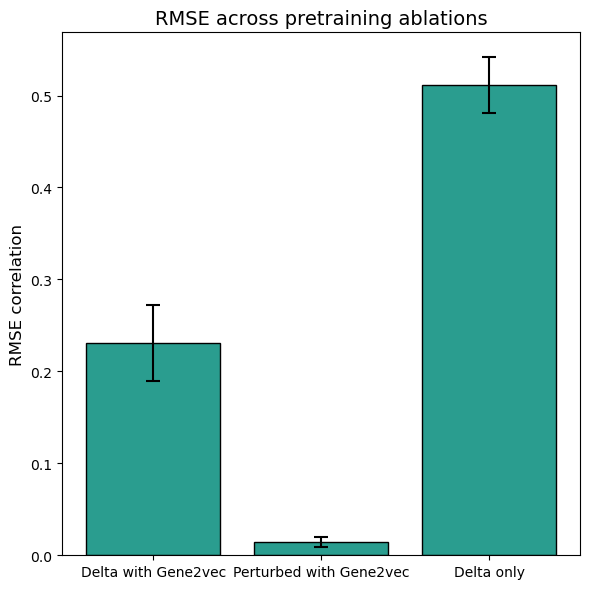

In [151]:
plt.figure(figsize=(6, 6))

plt.bar(stats_df.index, stats_df[0],
        yerr=stats_df[1],
        capsize=5,                  # Width of the error bar caps
        color='#2A9D8F',
        edgecolor='black',
        error_kw={'elinewidth': 1.5, 'capthick': 1.5})

plt.title('RMSE across pretraining ablations', fontsize=14)
plt.ylabel('RMSE correlation', fontsize=12)
plt.tight_layout()
plt.savefig('figs_to_use/rmse_pretraining.pdf')

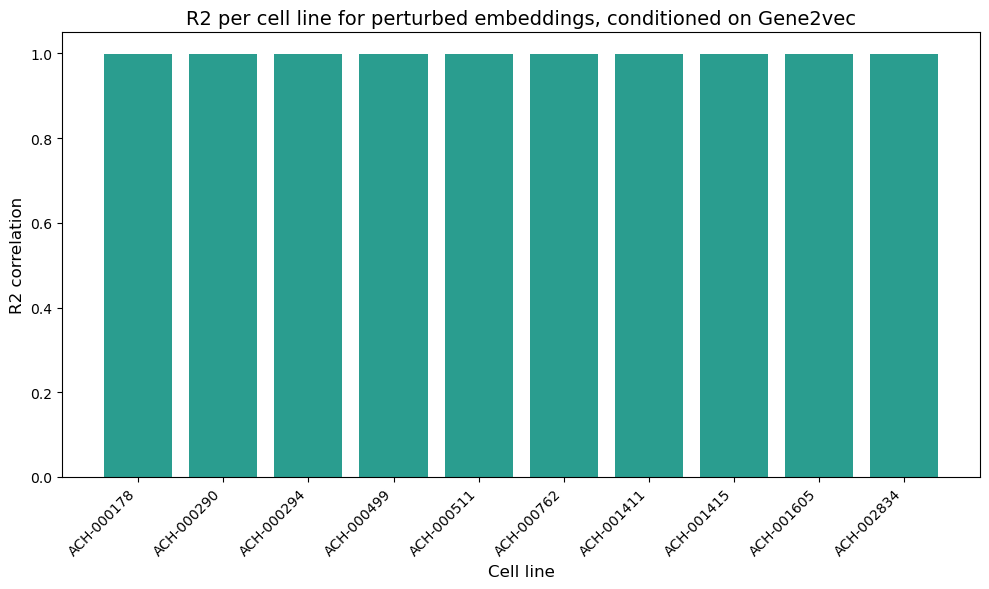

In [97]:
r2_corr = pt_df.groupby('patient').apply(r2).reset_index()

plt.figure(figsize=(10, 6))

plt.bar(r2_corr['patient'], r2_corr[0],
        color='#2A9D8F')

plt.title('R2 per cell line for perturbed embeddings, conditioned on Gene2vec', fontsize=14)
plt.xlabel('Cell line', fontsize=12)
plt.ylabel('R2 correlation', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()